<a href="https://colab.research.google.com/github/bhavanachintamani/xrwvm-fullstack_developer_capstone/blob/main/intership_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re
import os

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data = {
    'text': [
        "I love this product! It's amazing. #happy",
        "Terrible service, very disappointed. #worstexperience",
        "Had a great time at the park today. #fun",
        "Not satisfied with the new update. #bad",
        "Best movie ever! Highly recommend it. #awesome",
        "Feeling sad about the news today. #depressed"
    ]
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
#df = pd.read_csv(r'/content/sentimentdataset.csv')
import os

file_path = r'/content/sentimentdataset.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [ ]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove digits
    text_tokens = word_tokenize(text)  # Tokenize the text
    filtered_text = [word for word in text_tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(filtered_text)

In [ ]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove digits
    text_tokens = word_tokenize(text)  # Tokenize the text
    filtered_text = [word for word in text_tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(filtered_text)


In [ ]:
df.to_csv('/content/sentimentdataset.csv', index=False)

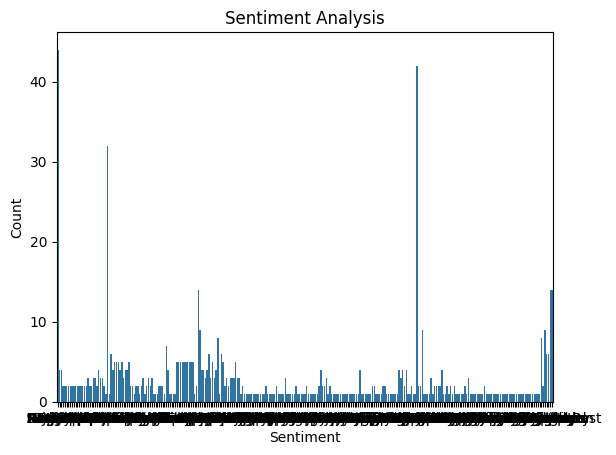

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot for the Sentiment column
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show the plot
plt.show()